# Explore here

Sistema de detección de agua
--
Este proyecto se va a realizar en Kaggle. Kaggle es conocida por organizar competencias de ciencia de datos en las que las personas y los equipos pueden competir para crear el mejor modelo en una variedad de tareas.

En concreto, exploraremos una competición que ya finalizó, y que premiaba a los mejores resultados con 25.000 dólares, repartidos a las mejores cuatro soluciones.

Paso 1: Regístrate o inicia sesión en Kaggle
El primer paso para participar en una competición es tener una cuenta en Kaggle. El registro es muy sencillo y versátil.

Paso 2: Participa en la competición
Aunque esté cerrada, todavía puedes subir tus soluciones y compararte con el resto de competidores en el ranking. Pinchando aquí puedes acceder a la competición en la que el propósito es predecir el volumen de agua.

Lee la información sobre la descripción del problema, las métricas de evaluación, el cronograma y los premios. Una vez que tengas una visión general de la competencia, prepara el notebook con el desarrollo del código y súbelo, compárate con el resto de desarrolladores.

Sigue los siguientes consejos:

Observa las soluciones propuestas por otros desarrolladores. Algunos utilizan series temporales, otros algoritmos supervisados como regresiones lineales, árboles de decisión, etc. Investiga qué modelo puede funcionar mejor para este caso de uso y explora todas las opciones.
Elijas el modelo que elijas, asegúrate de procesar y explorar los datos según se ha estudiado en los módulos pasados.
¡Ensayo y error! No pretendas obtener el mejor modelo a la primera, sigue intentándolo.

Datos
--
La realidad es que cada cuerpo de agua tiene características tan únicas que sus atributos no están vinculados entre sí. Esta competencia de análisis utiliza conjuntos de datos que son completamente independientes entre sí. Sin embargo, es fundamental comprender la disponibilidad total para preservar el agua en todo el país.

Cada conjunto de datos representa un tipo diferente de cuerpo de agua. Como cada cuerpo de agua es diferente del otro, las características relacionadas también son diferentes. Así, si por ejemplo consideramos un manantial de agua notamos que sus características son diferentes a las de un lago. Estas variaciones se esperan en función del comportamiento y las características únicas de cada cuerpo de agua. El Grupo Acea se ocupa de cuatro tipos diferentes de masas de agua: manantiales, lagos, ríos y acuíferos."

Desafío
--
### ¿Puedes construir una historia para predecir la cantidad de agua en cada cuerpo de agua único?

El desafío es determinar cómo las características influyen en la disponibilidad de agua de cada cuerpo de agua presentado. Para ser más sencillo, al comprender mejor los volúmenes, podrán garantizar la disponibilidad de agua para cada intervalo de tiempo del año.

El intervalo de tiempo se define como día/mes dependiendo de las medidas disponibles para cada cuerpo de agua. Los modelos deben capturar los volúmenes de cada masa de agua (por ejemplo, para un modelo que funciona en un intervalo mensual se espera un pronóstico para el mes).

El resultado deseado es un cuaderno que pueda generar cuatro modelos matemáticos, uno para cada categoría de cuerpo de agua que podrían ser aplicables a cada cuerpo de agua:

- Acuíferos
- Manantiales
- Ríos
- Lagos

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile
import os
import warnings


warnings.filterwarnings("ignore")

# Option 1: Use forward slashes
# Make sure this path is correct and the file exists
zip_file_path = '/path/to/your/acea-water-prediction.zip'  # Update with the correct path

# Ruta al directorio donde deseas extraer los archivos
extract_dir = '/path/to/your/extracted_files'  # Update with the correct path

# Crear directorio de extracción si no existe
os.makedirs(extract_dir, exist_ok=True)

# Extraer el archivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Archivos extraídos en: {extract_dir}')

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/acea-water-prediction.zip'

In [ ]:
# Ruta al archivo de datos extraído
data_file_path = os.path.join(extract_dir, 'G:\Mi unidad\Data Science\Practicas\Proyecto de Serie Temporal\Proyecto-Tutorial-de-Series-Temporales\extracted_files\Aquifer_Petrignano.csv')

# Cargar los datos en un DataFrame
data = pd.read_csv(data_file_path)

# Ver las primeras filas del DataFrame
data.head()


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


Descripción:
--
El campo de pozos de la llanura aluvial entre Ospedalicchio di Bastia Umbra y Petrignano se alimenta de tres acuíferos subterráneos separados por septos de baja permeabilidad. El acuífero puede considerarse un nivel freático de agua subterránea y también es alimentado por el río Chiascio. Los niveles de agua subterránea están influenciados por los siguientes parámetros: precipitaciones, profundidad del agua subterránea, temperaturas y volúmenes de drenaje, nivel del río Chiascio.

In [ ]:
# Información general sobre el dataset (tipos de datos, valores nulos, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [ ]:
# Descripciones estadísticas sobre los datos numéricos
data.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
std,5.217923,3.319858,3.214165,7.794871,7.701369,4751.864371,0.589088
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.250000,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,0.000000,-25.990000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,67.300000,-19.660000,-19.100000,33.000000,31.100000,0.000000,4.100000


In [ ]:
data.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [ ]:
#eliminar NaN
df = data.dropna()

# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Establecer la columna 'Date' como índice del dfFrame
df.set_index('Date', inplace=True)

df.head()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2009-01-01,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
2009-01-02,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2009-01-03,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
2009-01-04,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
2009-01-05,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


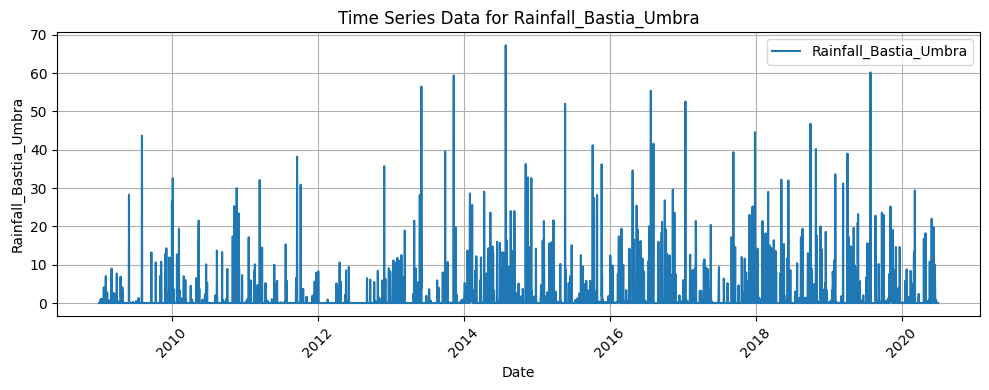

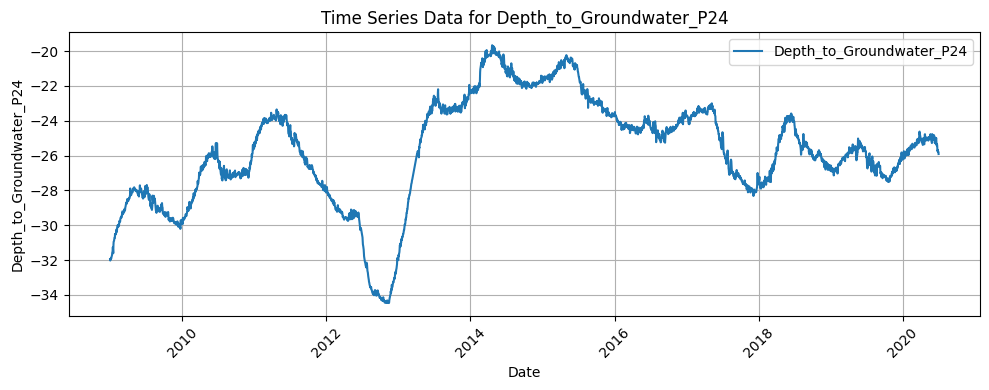

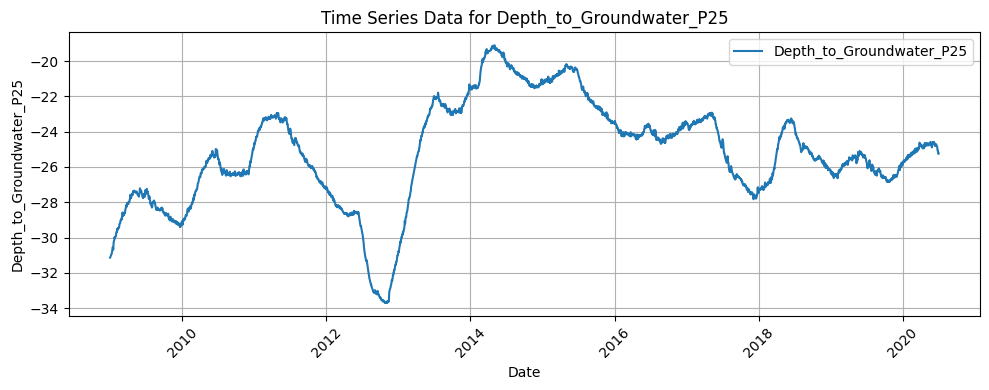

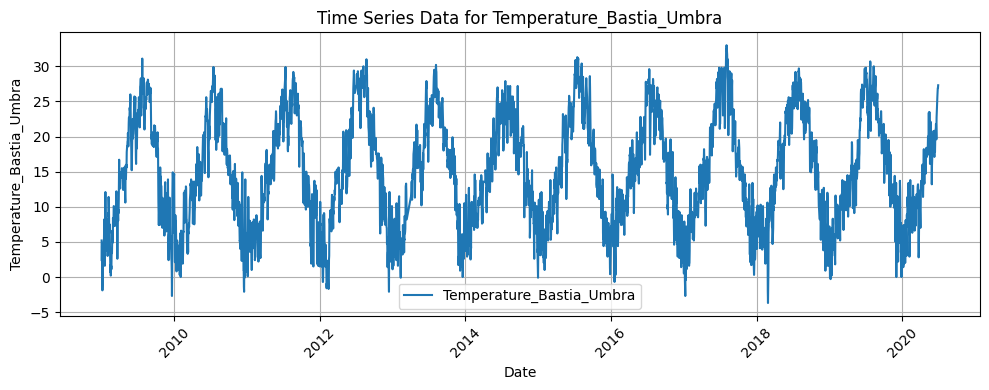

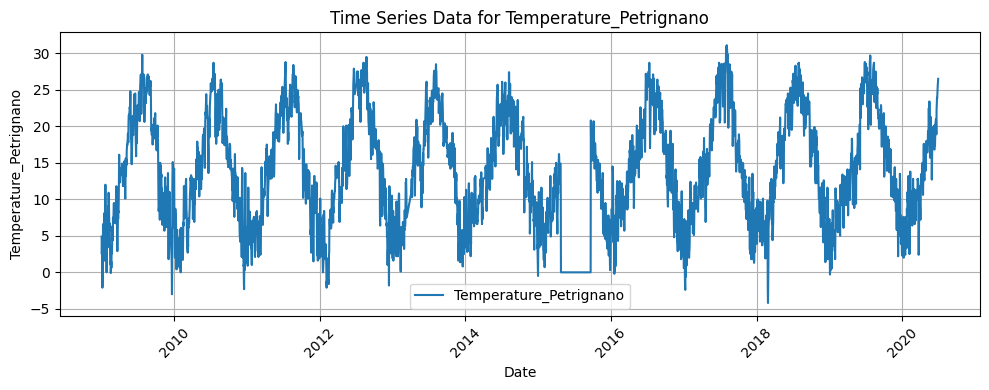

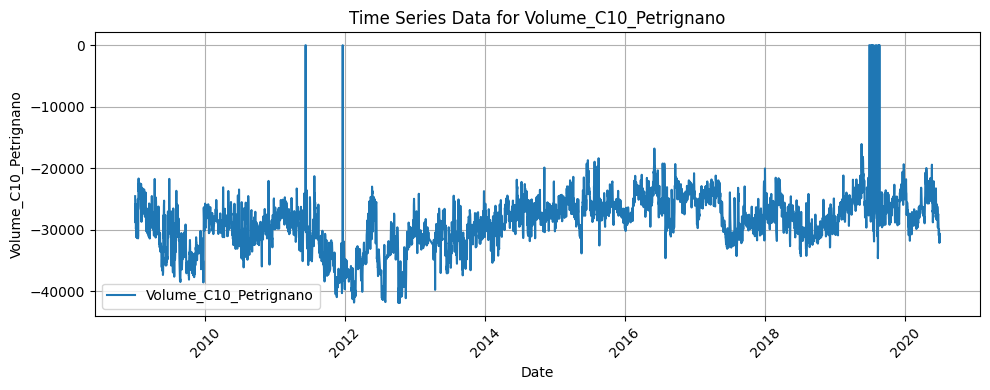

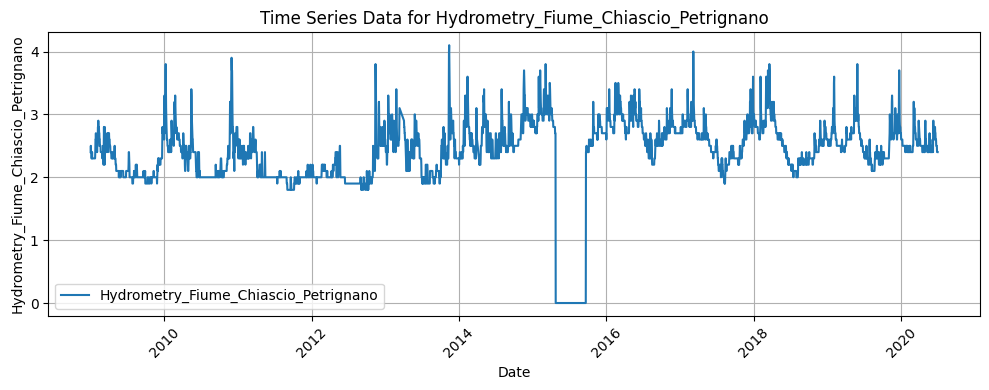

In [ ]:
# Graficar cada columna en un gráfico separado
for column in df.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[column], label=column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Time Series Data for {column}')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

Hay unos valores marcados como cero que en realidad son NaN. asi que los llevare a valor NaN

In [ ]:
# Reemplazar ceros por NaN
df.replace(0, np.nan, inplace=True)

# Mostrar el DataFrame después de reemplazar ceros
print("Después de reemplazar ceros con NaN:")
df.head()

Después de reemplazar ceros con NaN:


,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2009-01-01,NaN,-31.96,-31.14,5.2,4.9,-24530.688,2.4
2009-01-02,NaN,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2009-01-03,NaN,-31.97,-31.07,4.4,3.9,-25766.208,2.4
2009-01-04,NaN,-31.91,-31.05,0.8,0.8,-27919.296,2.4
2009-01-05,NaN,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


Voy a reemplazar los NaNs por el promedio de las columnas.

In [ ]:
# Sustituir NaN por la media de cada columna
df.fillna(df.mean(), inplace=True)

# Mostrar el DataFrame después de sustituir NaN
print("Después de sustituir NaN con la media de cada columna:")
df.head()


Después de sustituir NaN con la media de cada columna:


,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2009-01-01,6.22189,-31.96,-31.14,5.2,4.9,-24530.688,2.4
2009-01-02,6.22189,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2009-01-03,6.22189,-31.97,-31.07,4.4,3.9,-25766.208,2.4
2009-01-04,6.22189,-31.91,-31.05,0.8,0.8,-27919.296,2.4
2009-01-05,6.22189,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


ahora grafico de nuevo

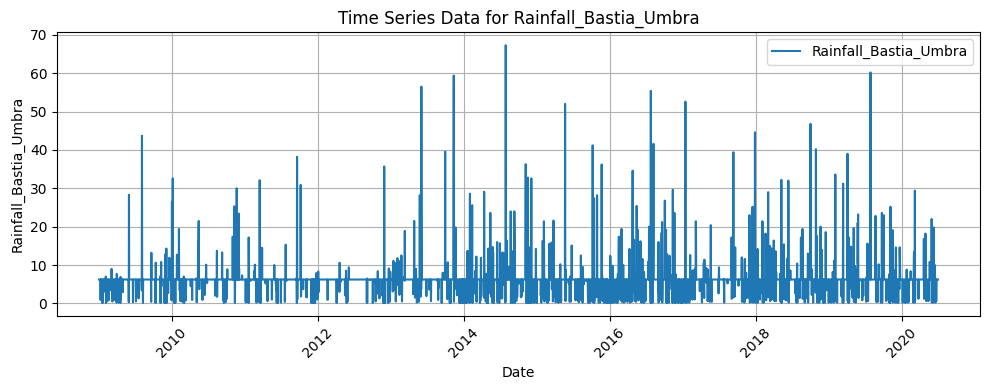

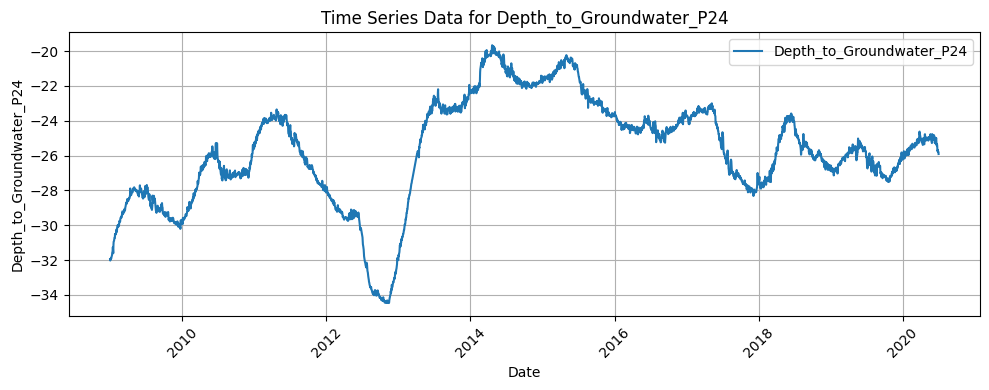

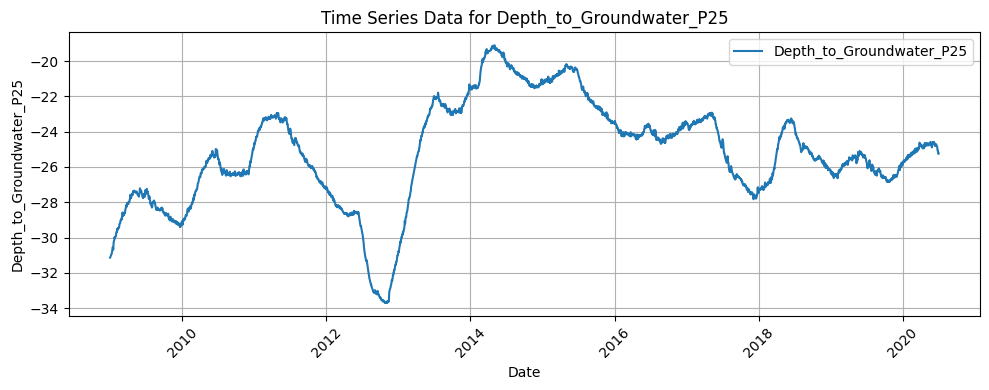

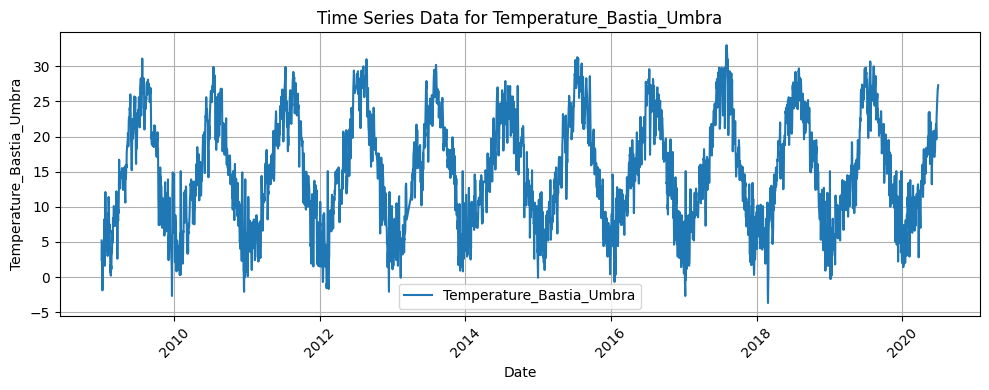

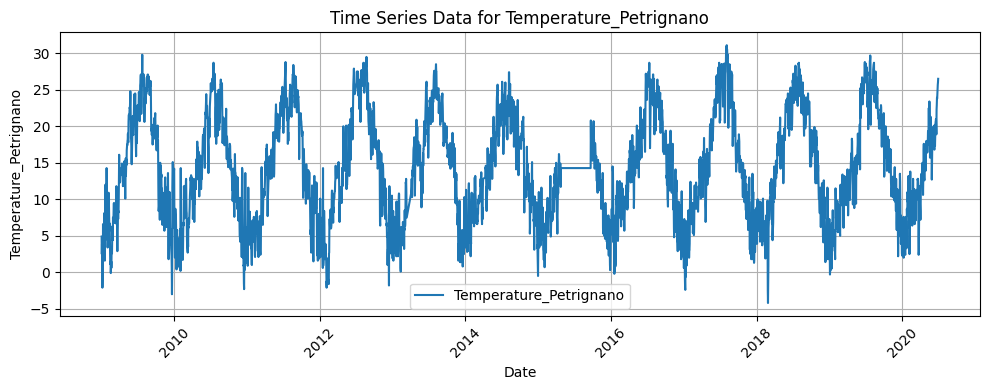

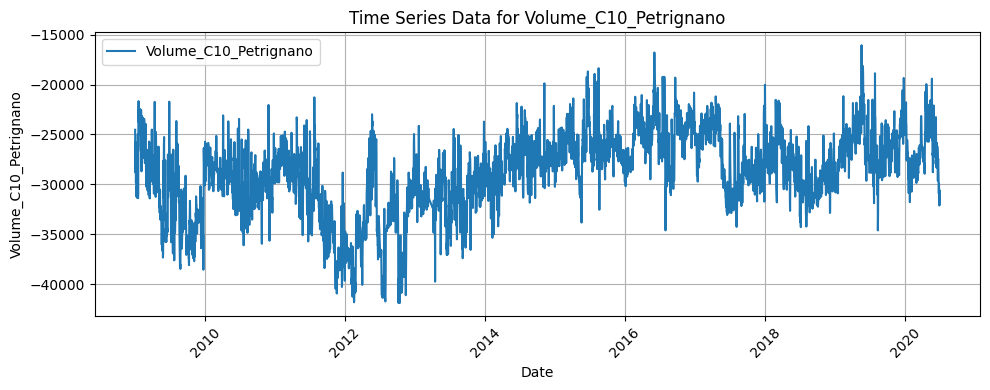

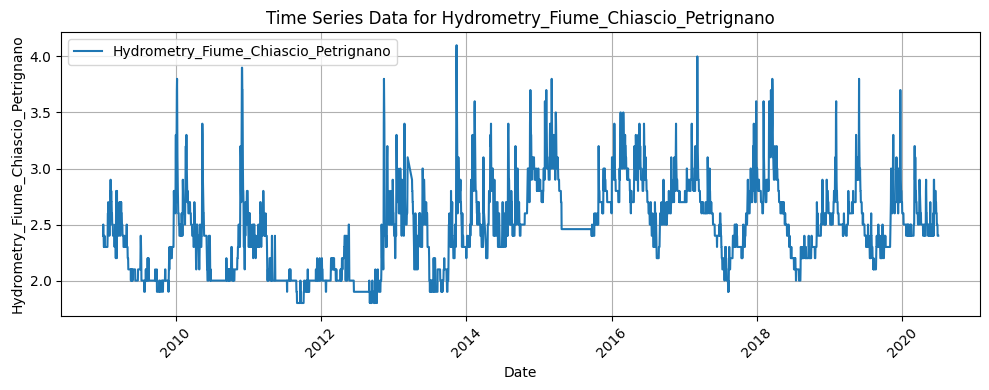

In [ ]:
# Graficar cada columna en un gráfico separado
for column in df.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[column], label=column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Time Series Data for {column}')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

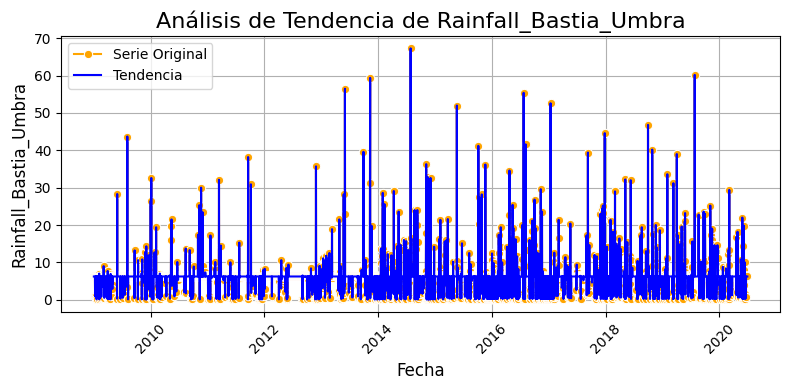

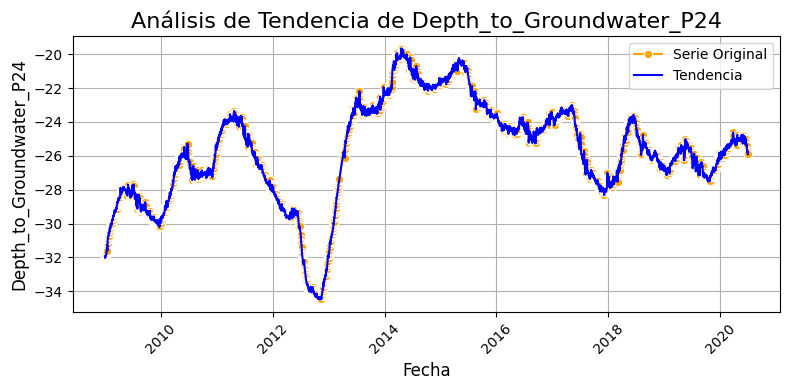

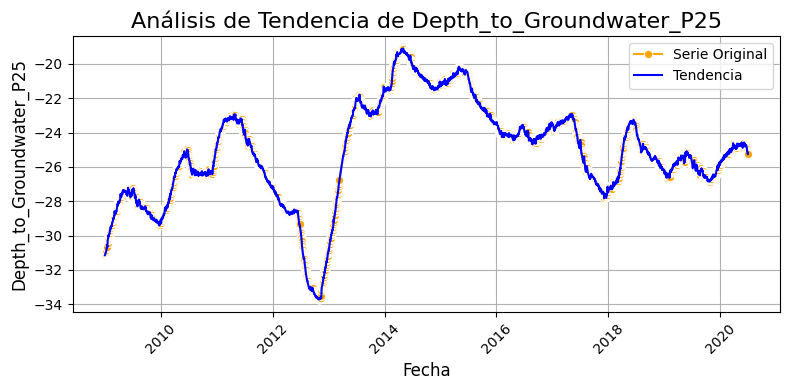

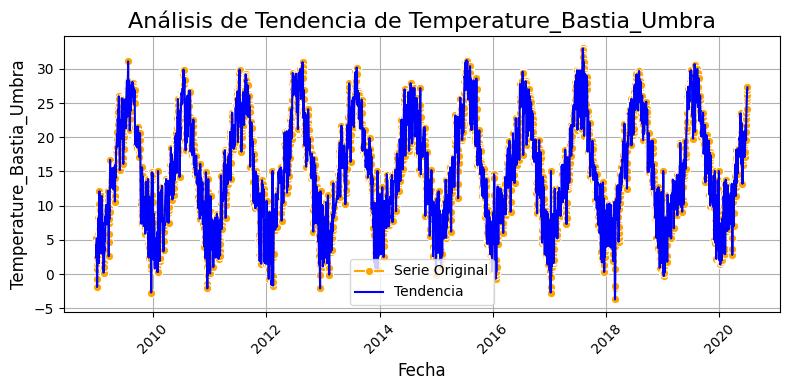

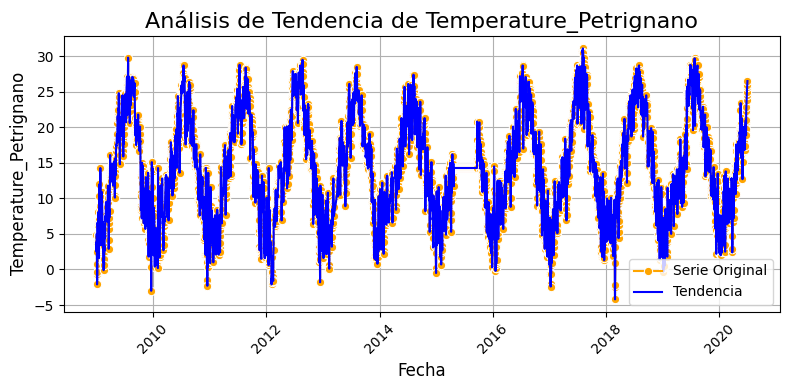

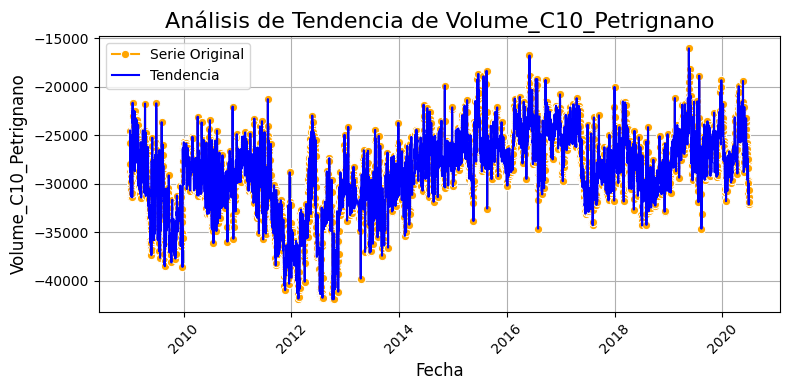

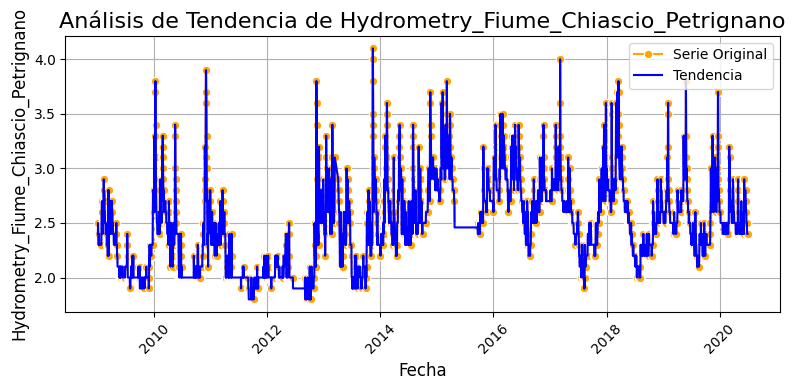

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Análisis de una serie temporal.

# # Descomposición y gráfico para cada columna numérica analisis de tendencia
for column in df.columns:
    # Descomponer solo si la longitud de la serie temporal es adecuada
    if len(df[column]) >= 2:
        result = seasonal_decompose(df[column], model='additive', period=1)
        trend = result.trend

        # Graficar la serie original y la tendencia
        plt.figure(figsize=(8, 4))
        sns.lineplot(data=df[column], label='Serie Original', color='orange', marker='o')
        sns.lineplot(data=trend, label='Tendencia', color='blue')
        plt.title(f'Análisis de Tendencia de {column}', fontsize=16)
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()


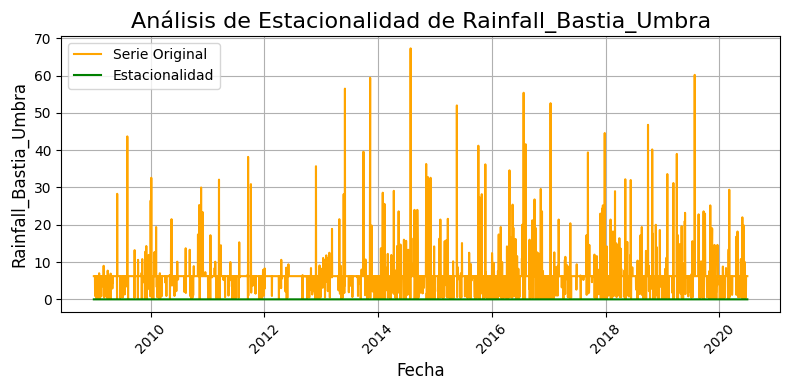

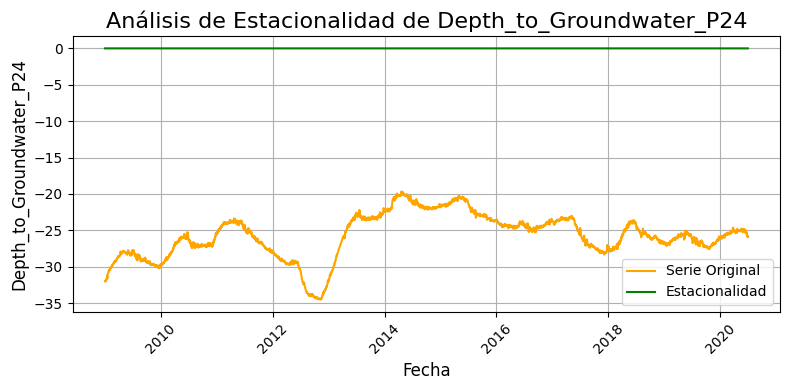

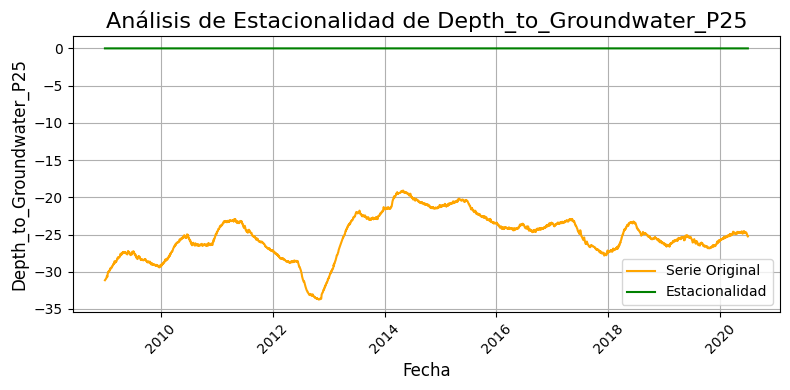

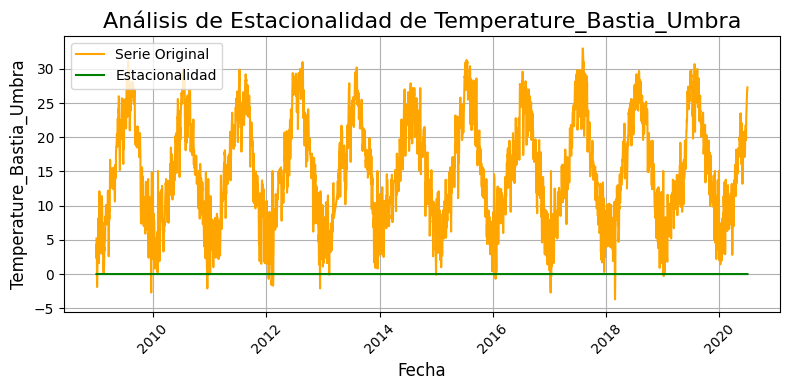

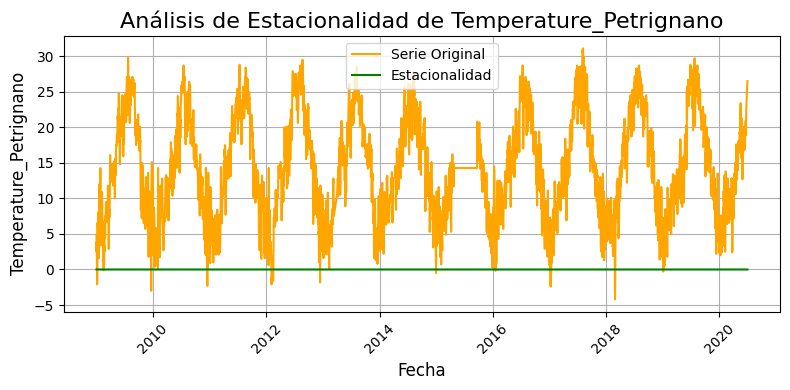

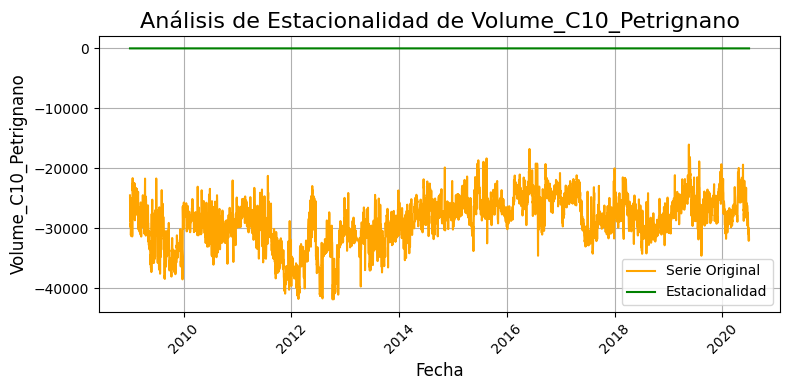

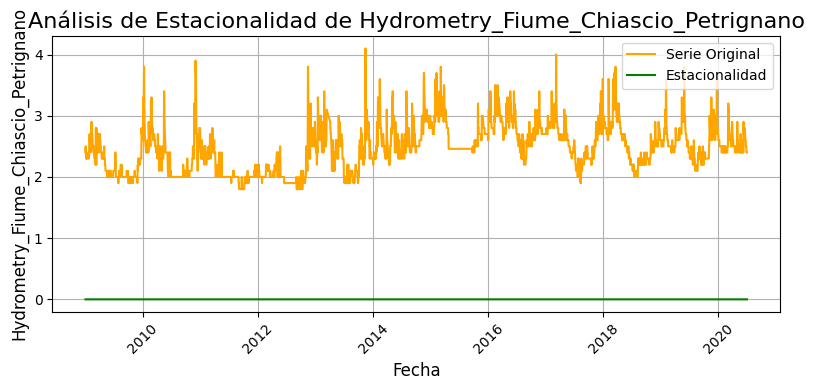

In [ ]:
# Análisis de una serie temporal. Descomposición y gráfico para cada columna numérica. Analisis de la Estacionalidad
for column in df.columns:
    # Descomponer solo si la longitud de la serie temporal es adecuada
    if len(df[column]) >= 2:
        result = seasonal_decompose(df[column], model='additive', period=1)  # Cambiar el periodo si es necesario
        seasonal = result.seasonal

        # Graficar la serie original y la estacionalidad
        plt.figure(figsize=(8, 4))
        sns.lineplot(data=df[column], label='Serie Original', color='orange')
        sns.lineplot(data=seasonal, label='Estacionalidad', color='green')
        plt.title(f'Análisis de Estacionalidad de {column}', fontsize=16)
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()

Prueba de Dickey-Fuller (Dickey-Fuller test), que es un contraste de hipótesis en el que la hipótesis nula es que la serie es estacionaria, y la alternativa, que es no estacionaria

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Función para realizar la prueba de Dickey-Fuller Aumentada
def adf_test(series, column_name):
    result = adfuller(series.dropna(), autolag='AIC')  # Eliminar NaNs antes de la prueba
    print(f'Resultados de la prueba de Dickey-Fuller para {column_name}:')
    print(f'Estadístico ADF: {result[0]}')
    print(f'p-valor: {result[1]}')
    print('Valores críticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print('---')

# Realizar la prueba ADF para cada columna numérica
for column in df.columns:
    adf_test(df[column], column)

Resultados de la prueba de Dickey-Fuller para Rainfall_Bastia_Umbra:
Estadístico ADF: -46.59174144411388
p-valor: 0.0
Valores críticos:
   1%: -3.431927471404566
   5%: -2.862237040274829
   10%: -2.5671410407892545
---
Resultados de la prueba de Dickey-Fuller para Depth_to_Groundwater_P24:
Estadístico ADF: -2.5780364868472625
p-valor: 0.09762217422779168
Valores críticos:
   1%: -3.431938584594036
   5%: -2.862241949570136
   10%: -2.567143654275708
---
Resultados de la prueba de Dickey-Fuller para Depth_to_Groundwater_P25:
Estadístico ADF: -2.8885180200531426
p-valor: 0.04669958018312351
Valores críticos:
   1%: -3.4319378131425595
   5%: -2.8622416087789935
   10%: -2.5671434728538394
---
Resultados de la prueba de Dickey-Fuller para Temperature_Bastia_Umbra:
Estadístico ADF: -3.6956443653422477
p-valor: 0.004174838842145253
Valores críticos:
   1%: -3.4319320510527267
   5%: -2.862239063354696
   10%: -2.567142117784963
---
Resultados de la prueba de Dickey-Fuller para Temperature_

Series Estacionarias:

- Rainfall_Bastia_Umbra
- Depth_to_Groundwater_P25
- Temperature_Bastia_Umbra
- Temperature_Petrignano
- Volume_C10_Petrignano
- Hydrometry_Fiume_Chiascio_Petrignano

No estacionaria: Depth_to_Groundwater_P24

Se debe diferenciar esta serie. La diferenciación es la forma más común de hacer que una serie temporal sea estacionaria. Implica restar el valor actual del valor anterior, lo que elimina tendencias lineales.

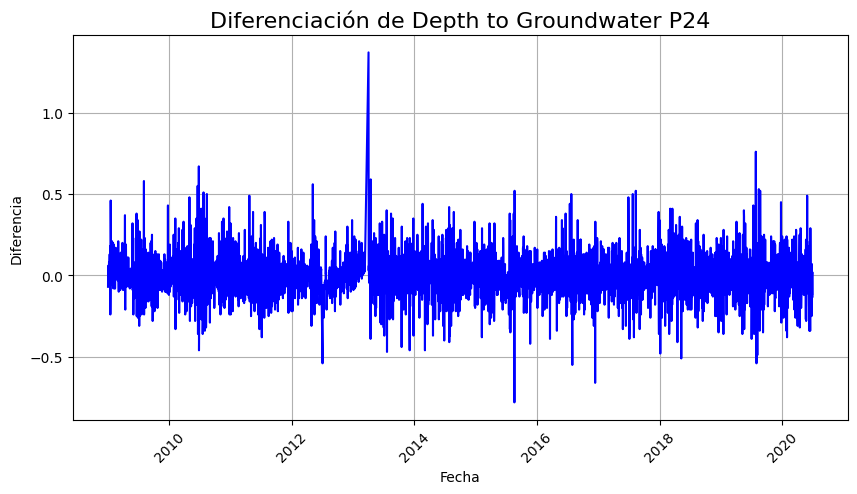

Resultados de la prueba de Dickey-Fuller para Depth_to_Groundwater_P24_diff:
Estadístico ADF: -6.598678236702232
p-valor: 6.822500969075106e-09
Valores críticos:
   1%: -3.431938584594036
   5%: -2.862241949570136
   10%: -2.567143654275708
---


In [ ]:
# Sustituir NaN por la media de cada columna
df.fillna(df.mean(), inplace=True)

# Aplicar diferenciación a Depth_to_Groundwater_P24
df['Depth_to_Groundwater_P24_diff'] = df['Depth_to_Groundwater_P24'].diff()

# Visualizar la serie diferenciada
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Depth_to_Groundwater_P24_diff'], linestyle='-', color='blue')
plt.title('Diferenciación de Depth to Groundwater P24', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Diferencia')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Prueba de Dickey-Fuller Aumentada en la serie diferenciada
def adf_test(series, column_name):
    result = adfuller(series.dropna(), autolag='AIC')  # Eliminar NaNs antes de la prueba
    print(f'Resultados de la prueba de Dickey-Fuller para {column_name}:')
    print(f'Estadístico ADF: {result[0]}')
    print(f'p-valor: {result[1]}')
    print('Valores críticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print('---')

# Realizar la prueba ADF en la serie diferenciada
adf_test(df['Depth_to_Groundwater_P24_diff'], 'Depth_to_Groundwater_P24_diff')

Rainfall_Bastia_Umbra:
  Desviación estándar: 4.49
  Media: 6.22
  Coeficiente de variación: 72.10%
---


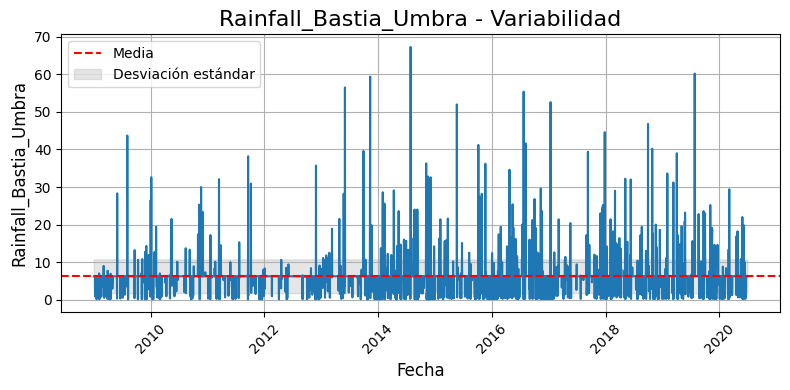

Depth_to_Groundwater_P24:
  Desviación estándar: 3.03
  Media: -25.73
  Coeficiente de variación: -11.79%
---


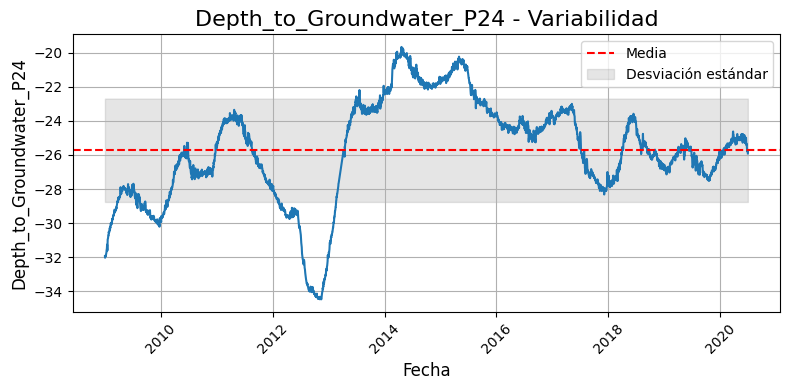

Depth_to_Groundwater_P25:
  Desviación estándar: 2.95
  Media: -25.18
  Coeficiente de variación: -11.72%
---


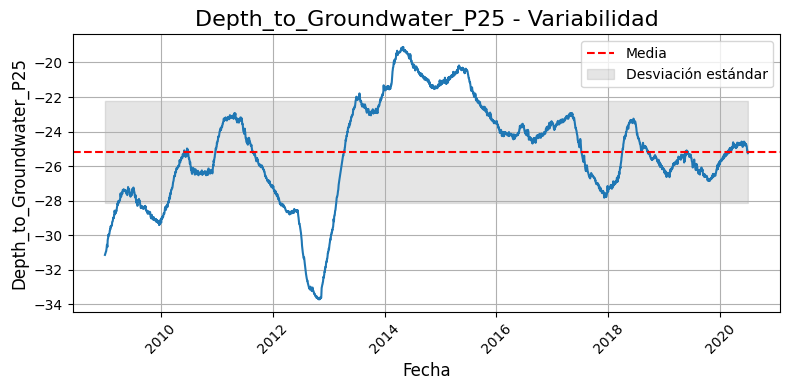

Temperature_Bastia_Umbra:
  Desviación estándar: 7.78
  Media: 15.07
  Coeficiente de variación: 51.61%
---


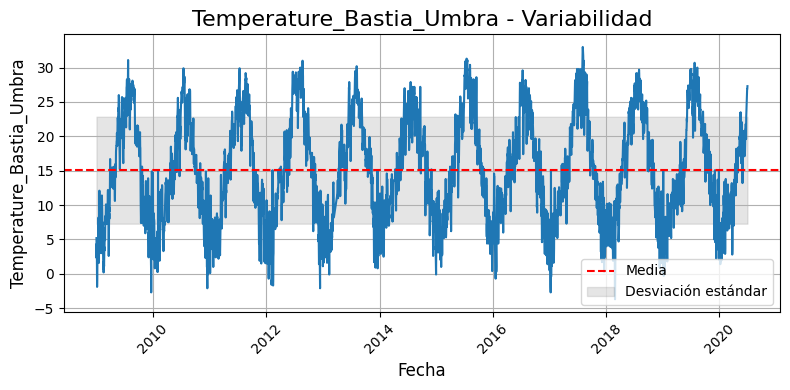

Temperature_Petrignano:
  Desviación estándar: 7.23
  Media: 14.28
  Coeficiente de variación: 50.63%
---


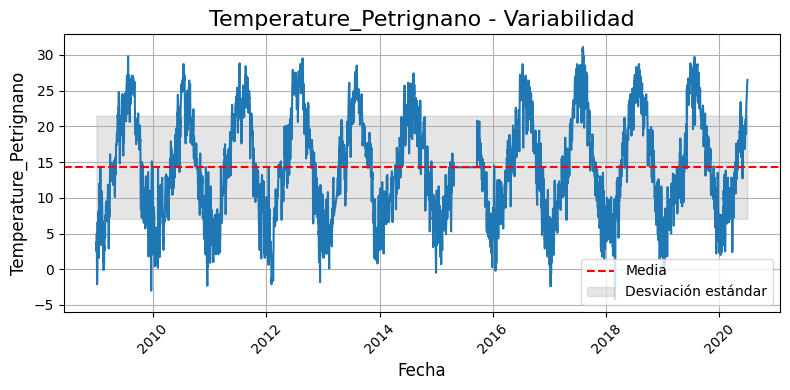

Volume_C10_Petrignano:
  Desviación estándar: 3992.58
  Media: -28820.85
  Coeficiente de variación: -13.85%
---


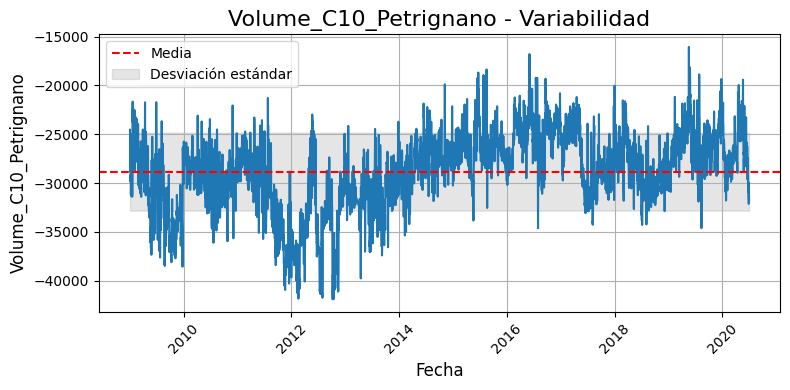

Hydrometry_Fiume_Chiascio_Petrignano:
  Desviación estándar: 0.37
  Media: 2.46
  Coeficiente de variación: 15.14%
---


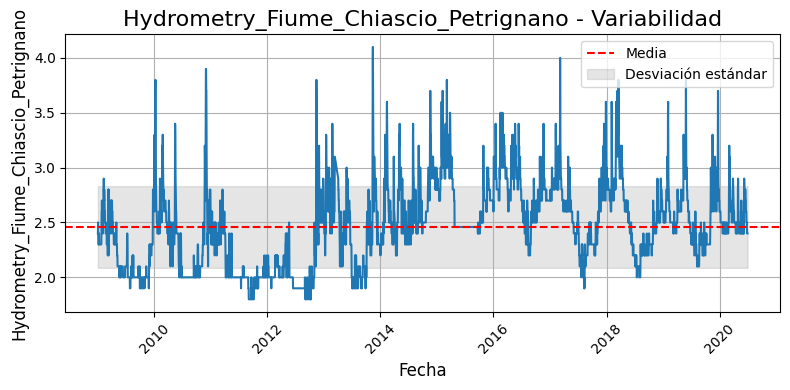

Depth_to_Groundwater_P24_diff:
  Desviación estándar: 0.13
  Media: 0.00
  Coeficiente de variación: 8921.71%
---


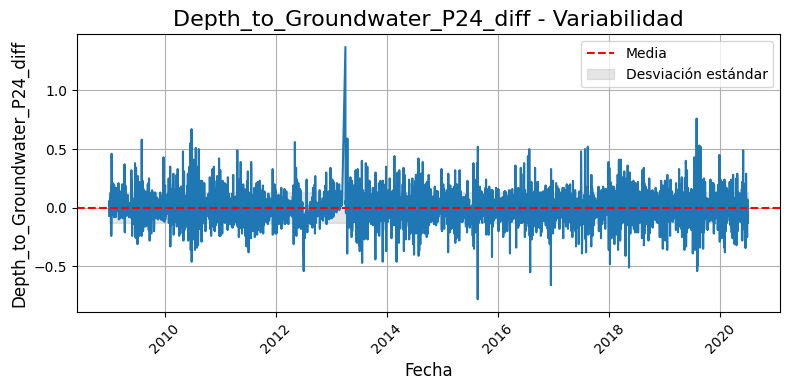

In [ ]:
# Análisis de una serie temporal. Descomposición y gráfico para cada columna numérica. Analisis de la Variabilidad

# Visualización de la variabilidad para cada columna numérica
for column in df.columns:
    # Calcular desviación estándar y coeficiente de variación
    std_dev = df[column].std()
    mean = df[column].mean()
    coef_var = std_dev / mean if mean != 0 else np.nan  # Para evitar división por cero

    print(f"{column}:")
    print(f"  Desviación estándar: {std_dev:.2f}")
    print(f"  Media: {mean:.2f}")
    print(f"  Coeficiente de variación: {coef_var:.2%}" if not np.isnan(coef_var) else "  Coeficiente de variación: -")
    print('---')

    # Graficar la columna y la media/desviación estándar
    plt.figure(figsize=(8, 4))
    plt.plot(df.index, df[column], linestyle='-')
    plt.title(f'{column} - Variabilidad', fontsize=16)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.axhline(y=mean, color='red', linestyle='--', label='Media')
    plt.fill_between(df.index, mean - std_dev, mean + std_dev,
                     color='gray', alpha=0.2, label='Desviación estándar')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

Resultados de la prueba de Dickey-Fuller para Rainfall_Bastia_Umbra:
  Estadístico ADF: -46.59174144411388
  p-valor: 0.0
---


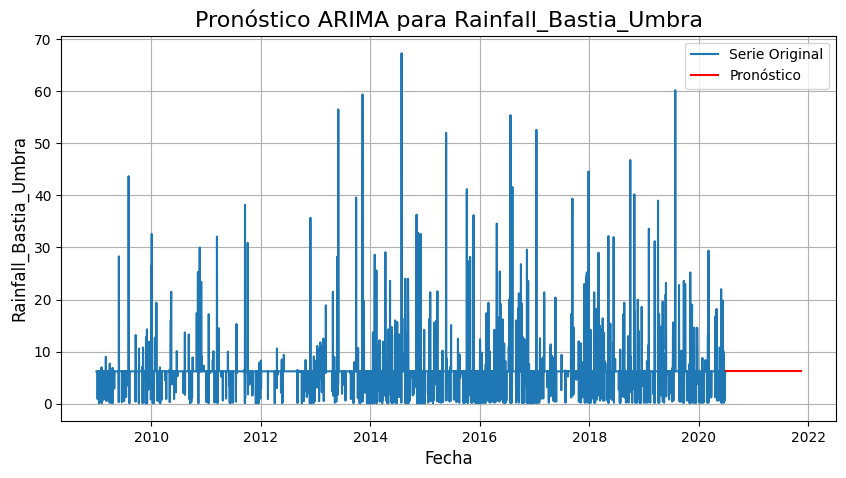

Resultados de la prueba de Dickey-Fuller para Depth_to_Groundwater_P24:
  Estadístico ADF: -2.5780364868472625
  p-valor: 0.09762217422779168
---
Resultados de la prueba de Dickey-Fuller para Depth_to_Groundwater_P24:
  Estadístico ADF: -6.598678236702232
  p-valor: 6.822500969075106e-09
---


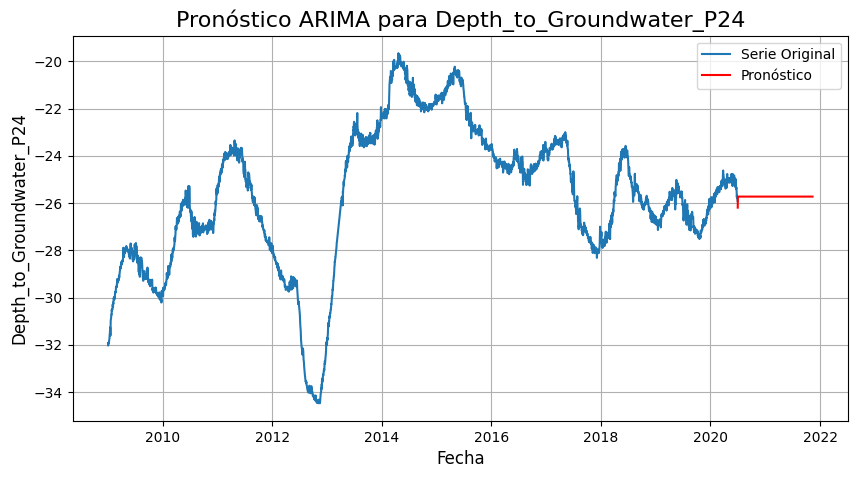

Resultados de la prueba de Dickey-Fuller para Depth_to_Groundwater_P25:
  Estadístico ADF: -2.8885180200531426
  p-valor: 0.04669958018312351
---


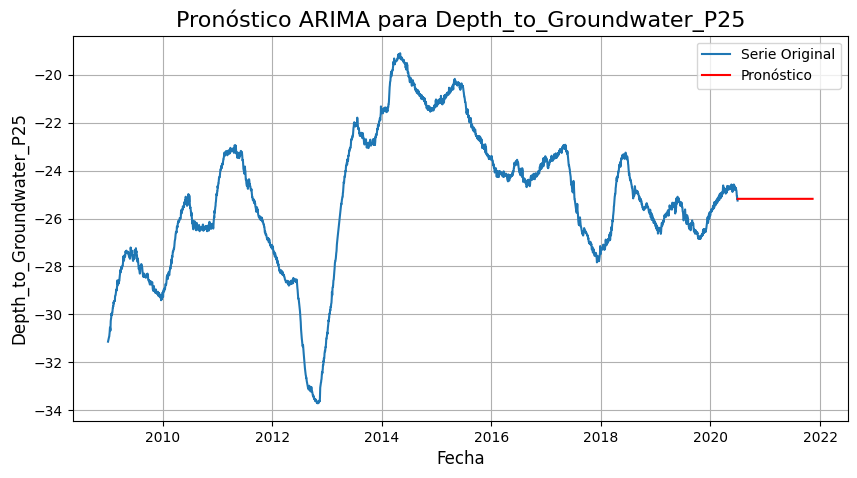

Resultados de la prueba de Dickey-Fuller para Temperature_Bastia_Umbra:
  Estadístico ADF: -3.6956443653422477
  p-valor: 0.004174838842145253
---


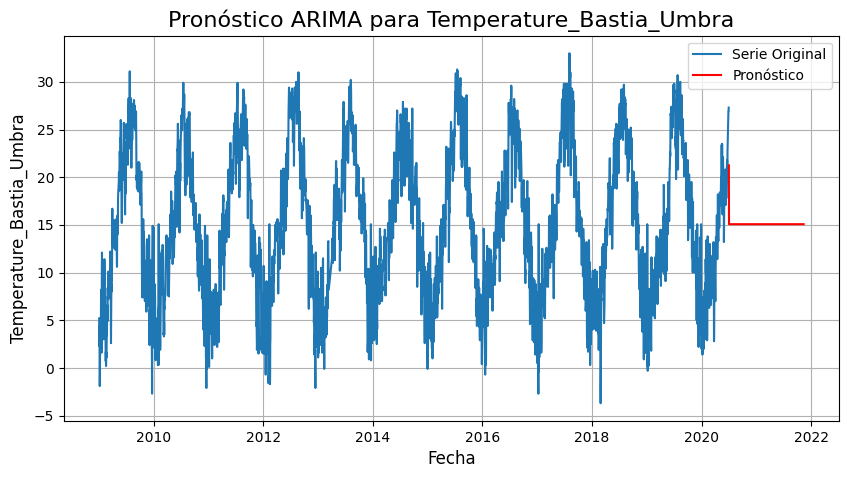

Resultados de la prueba de Dickey-Fuller para Temperature_Petrignano:
  Estadístico ADF: -3.6858062348756944
  p-valor: 0.004317290046640404
---


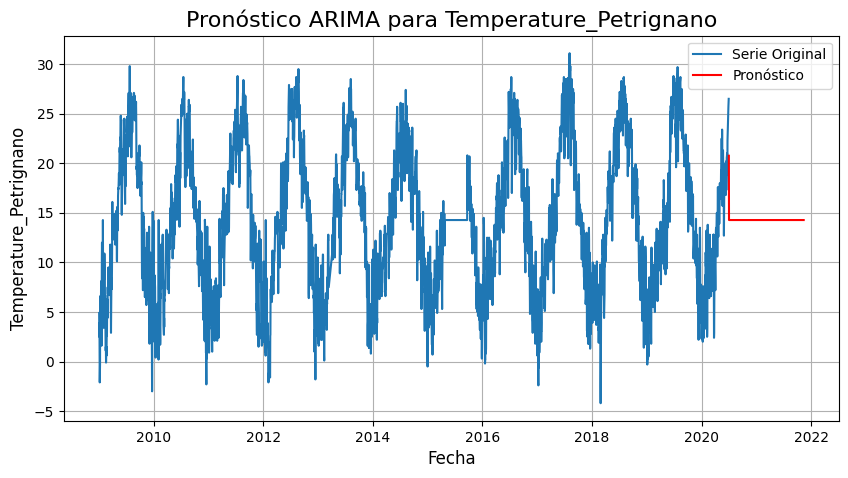

Resultados de la prueba de Dickey-Fuller para Volume_C10_Petrignano:
  Estadístico ADF: -4.484585679784318
  p-valor: 0.00020964292222989343
---


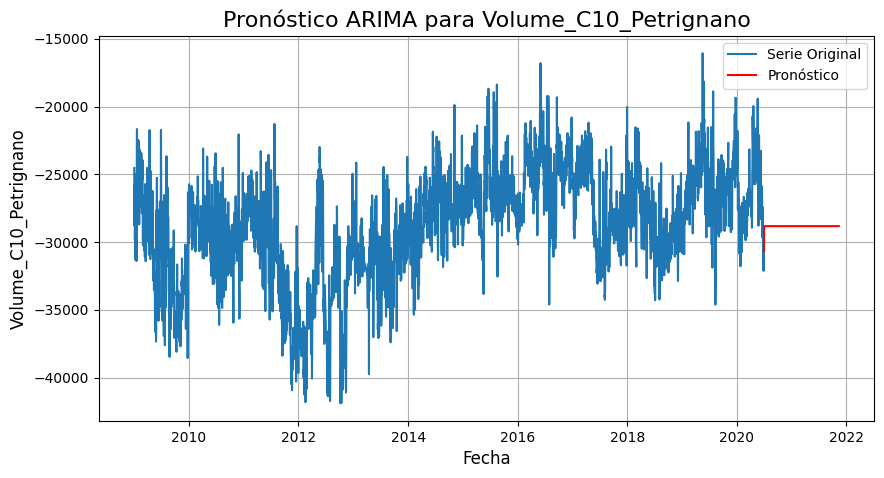

Resultados de la prueba de Dickey-Fuller para Hydrometry_Fiume_Chiascio_Petrignano:
  Estadístico ADF: -5.079449982011359
  p-valor: 1.541603090934971e-05
---


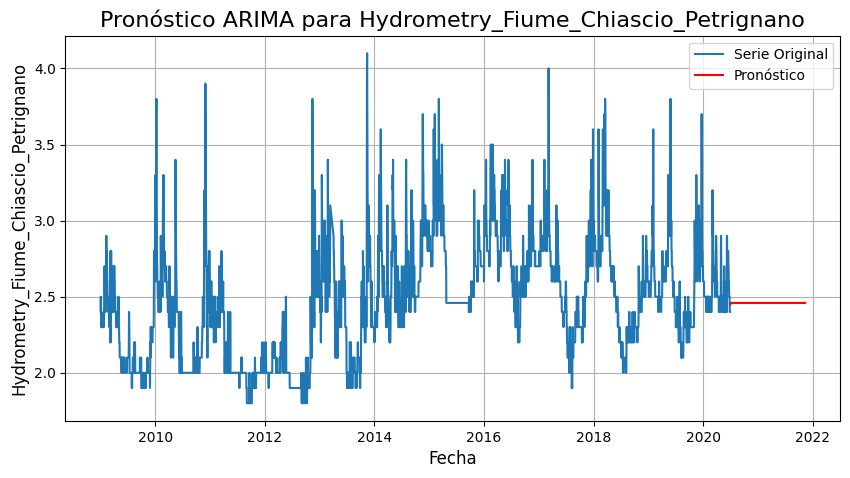

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Comprobar estacionariedad y diferenciar si es necesario
def check_stationarity(series):
    result = adfuller(series)
    print(f"Resultados de la prueba de Dickey-Fuller para {series.name}:")
    print(f"  Estadístico ADF: {result[0]}")
    print(f"  p-valor: {result[1]}")
    print('---')
    return result[1] < 0.05  # Retorna True si es estacionaria

# Función para aplicar ARIMA a cada columna
def apply_arima(series, column_name):
    # Comprueba la estacionariedad
    is_stationary = check_stationarity(series)

    if not is_stationary:
        # Aplica la diferenciación
        series_diff = series.diff().dropna()
        is_stationary = check_stationarity(series_diff)
        if not is_stationary:
            print(f"{column_name} no se puede hacer estacionario con una diferenciación simple.")
            return

    # Ajustar un modelo ARIMA a la serie
    model = ARIMA(series, order=(0, 0, 1))
    model_fit = model.fit()

    # Hacer pronósticos de los siguientes 500 pasos
    forecast = model_fit.forecast(steps=500)

    # Graficar resultados
    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series, label='Serie Original')
    plt.plot(pd.date_range(start=series.index[-1], periods=501, freq='D')[1:], forecast, label='Pronóstico', color='red')
    plt.title(f'Pronóstico ARIMA para {column_name}', fontsize=16)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

# Aplicar ARIMA a todas las columnas numéricas
for column in df.columns:
    if df[column].isnull().sum() == 0:  # Comprobar que no hay valores NaN
        apply_arima(df[column], column)